# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [ ]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

IndentationError: unexpected indent (567717655.py, line 2)

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
#!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
#!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


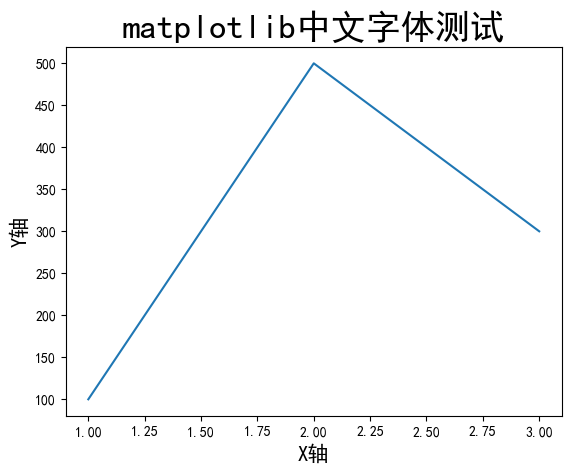

In [3]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [4]:
import os
os.chdir('mmsegmentation')

In [5]:
os.getcwd()

'd:\\desktop\\source\\MMSegmentation_young\\mmsegmentation'

## 导入工具包

In [6]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [9]:
# 日志文件路径
log_path = './work_dirs/ZihaoDataset-KNet/20251209_220505/vis_data/scalars.json'

In [10]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [11]:
len(json_list)

241

In [12]:
eval(json_list[4])

{'base_lr': 2.3999999999999953e-05,
 'lr': 2.3999999999999953e-05,
 'data_time': 0.005189204216003418,
 'grad_norm': 247.16653213500976,
 'loss': 2.8290956735610964,
 'decode.loss_ce.s0': 0.5808866441249847,
 'decode.acc_seg.s0': 94.036865234375,
 'decode.loss_ce.s1': 0.539179352670908,
 'decode.acc_seg.s1': 95.40939331054688,
 'decode.loss_ce.s2': 0.7066080540418624,
 'decode.acc_seg.s2': 95.87783813476562,
 'decode.loss_ce.s3': 0.7725362598896026,
 'decode.acc_seg.s3': 96.58737182617188,
 'aux.loss_ce': 0.22988537549972535,
 'aux.acc_seg': 80.10635375976562,
 'time': 0.28580007553100584,
 'iter': 400,
 'memory': 4611,
 'step': 400}

In [14]:

for each in json_list[:-1]:
    row = pd.DataFrame([eval(each)])  # 把字典转成单行 DataFrame
    if 'aAcc' in each:
        df_test = pd.concat([df_test, row], ignore_index=True)
    else:
        df_train = pd.concat([df_train, row], ignore_index=True)

In [15]:
df_train

,base_lr,lr,data_time,grad_norm,loss,decode.loss_ce.s0,decode.acc_seg.s0,decode.loss_ce.s1,decode.acc_seg.s1,decode.loss_ce.s2,decode.acc_seg.s2,decode.loss_ce.s3,decode.acc_seg.s3,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,7.200000e-07,7.200000e-07,0.005386,1052.045380,4.391594,0.711473,38.707733,0.790835,52.663422,1.300453,42.939758,1.306247,42.157745,0.282586,41.028595,0.288032,12,5465,12
1,6.000000e-06,6.000000e-06,0.005781,384.084499,3.146456,0.709927,24.533081,0.669870,80.326843,0.696045,62.580109,0.790627,84.133148,0.279987,39.194489,0.287087,100,4611,100
2,1.200000e-05,1.200000e-05,0.005348,176.462936,2.286646,0.721300,50.275421,0.403362,53.342438,0.472052,52.255249,0.425121,54.953766,0.264811,56.174469,0.286522,200,4611,200
3,1.800000e-05,1.800000e-05,0.005577,170.714612,2.471775,0.658396,53.880310,0.509159,91.327667,0.531313,72.515869,0.529509,89.535522,0.243398,88.505554,0.285947,300,4611,300
4,2.400000e-05,2.400000e-05,0.005189,247.166532,2.829096,0.580887,94.036865,0.539179,95.409393,0.706608,95.877838,0.772536,96.587372,0.229885,80.106354,0.285800,400,4611,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6.000000e-05,6.000000e-05,0.005482,45.703146,0.304283,0.064732,99.600220,0.060697,99.630737,0.060397,99.614716,0.058670,99.617004,0.059788,99.648285,0.289526,19600,4600,19600
197,6.000000e-05,6.000000e-05,0.005482,7.264861,0.154707,0.035767,98.615265,0.033960,98.550415,0.034822,98.516846,0.034631,98.527527,0.015525,98.799133,0.289825,19700,4600,19700
198,6.000000e-05,6.000000e-05,0.005086,4.461884,0.172846,0.039206,99.362183,0.038799,99.635315,0.038590,99.435425,0.037972,99.501038,0.018277,99.317932,0.290523,19800,4600,19800
199,6.000000e-05,6.000000e-05,0.005571,12.389591,0.145380,0.031876,96.846008,0.033058,96.833801,0.035246,96.720886,0.032757,96.820831,0.012443,97.071075,0.289426,19900,4600,19900


In [16]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,79.98,65.91,85.02,79.34,79.34,80.29,85.02,0.539309,1.635141,500
1,93.53,85.87,91.24,92.31,92.31,93.64,91.24,0.007120,0.388611,1000
2,92.75,85.19,93.80,91.94,91.94,90.73,93.80,0.007400,0.389463,1500
3,92.30,84.16,92.42,91.32,91.32,90.46,92.42,0.007257,0.369995,2000
4,91.69,83.27,92.74,90.79,90.79,89.58,92.74,0.017607,0.386373,2500
5,92.30,84.40,93.49,91.47,91.47,90.23,93.49,0.007269,0.368178,3000
6,87.35,75.68,87.78,85.99,85.99,84.93,87.78,0.006981,0.367307,3500
7,93.13,85.08,90.77,91.84,91.84,93.18,90.77,0.007116,0.368520,4000
8,90.39,80.18,88.67,88.84,88.84,89.03,88.67,0.007456,0.368140,4500
9,92.83,84.74,91.36,91.65,91.65,91.95,91.36,0.008260,0.367804,5000


## 导出训练日志表格

In [17]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [18]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [19]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

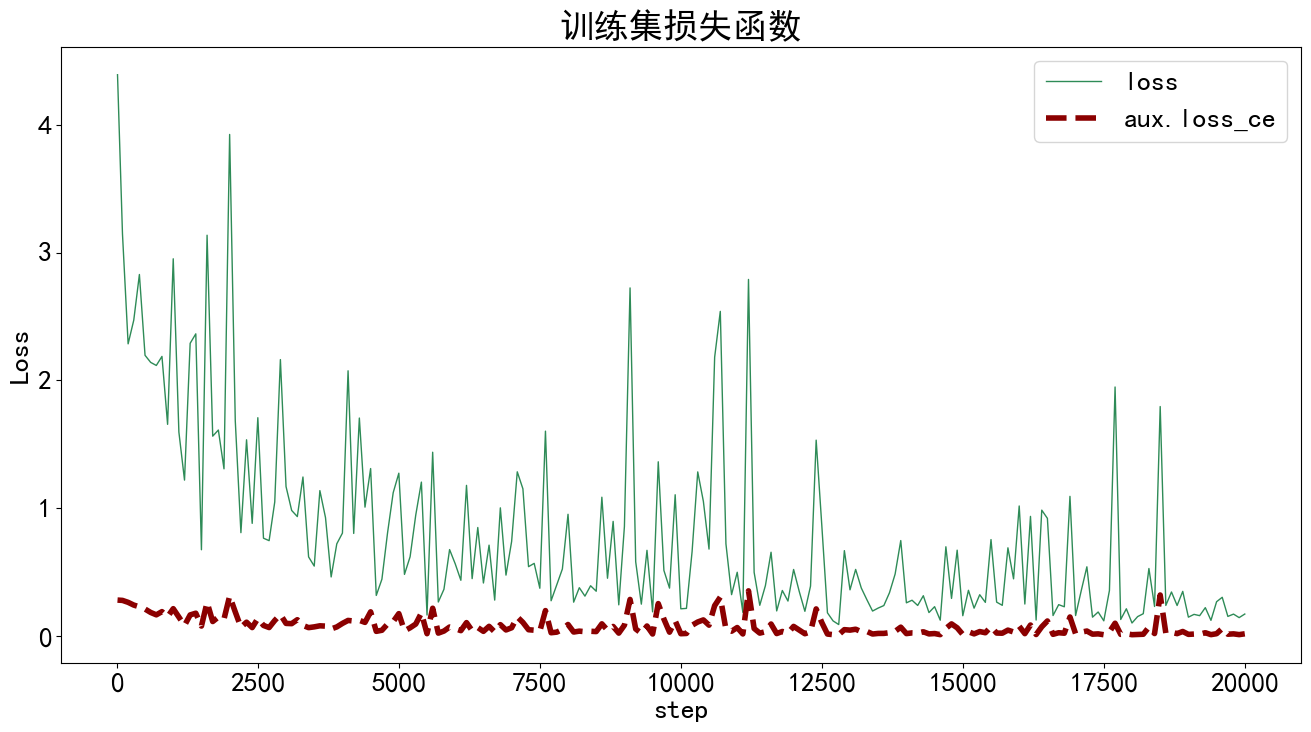

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [21]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

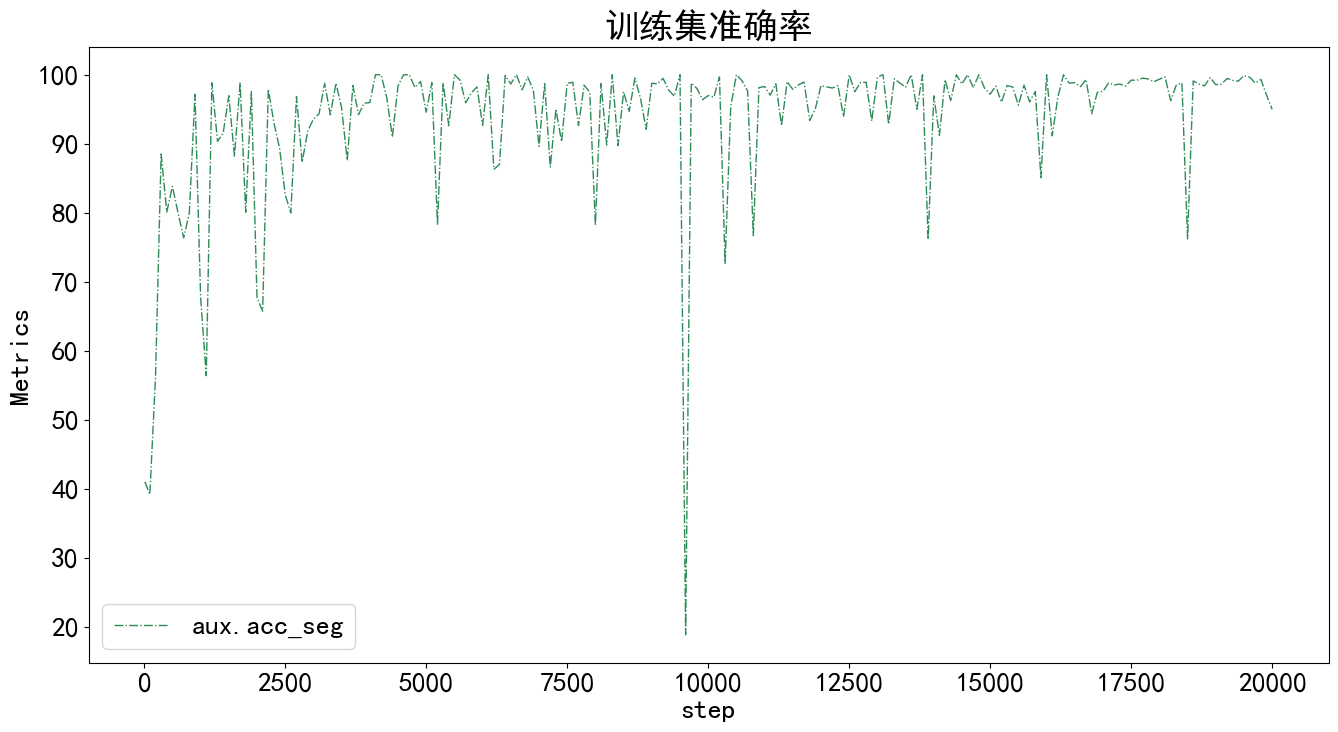

In [22]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [23]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [24]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

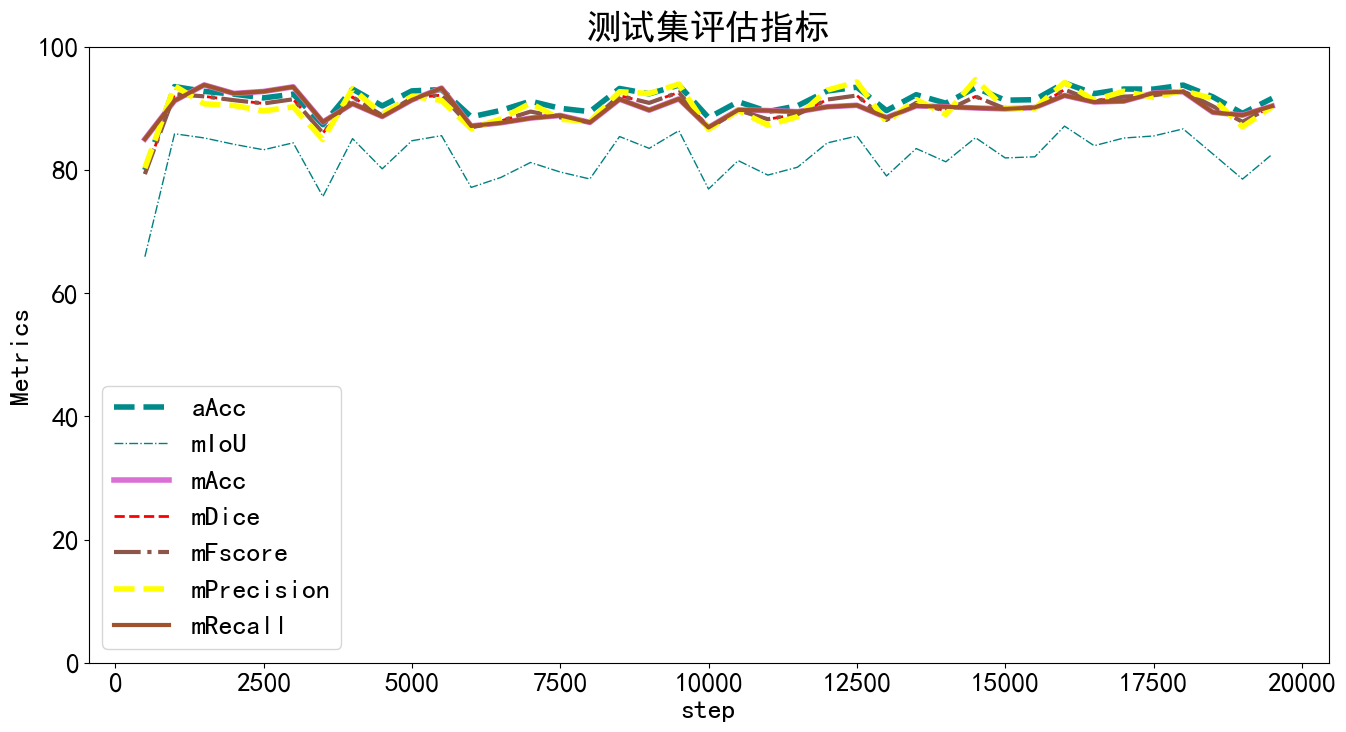

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()